In [1]:
import pandas as pd
import numpy as np
from helper_functions import *
import matplotlib.pyplot as plt

## Coffe Maschine

In [2]:
df_cm = pd.read_csv("C:/Users/sanam/Documents/GeLaP/hh-16/label_002.csv")
df_cm_cache = pre_process(df_cm, 'coffee_machine')


In [3]:
df_cm_cache

,coffee_machine_electricity_consumption
time,
2019-10-21 12:30:00,0.075000
2019-10-21 12:30:01,0.040000
2019-10-21 12:30:02,0.200000
2019-10-21 12:30:03,0.080000
2019-10-21 12:30:04,0.050000
...,...
2019-11-25 11:22:43,0.000000
2019-11-25 11:22:44,0.050000
2019-11-25 11:22:45,0.200000


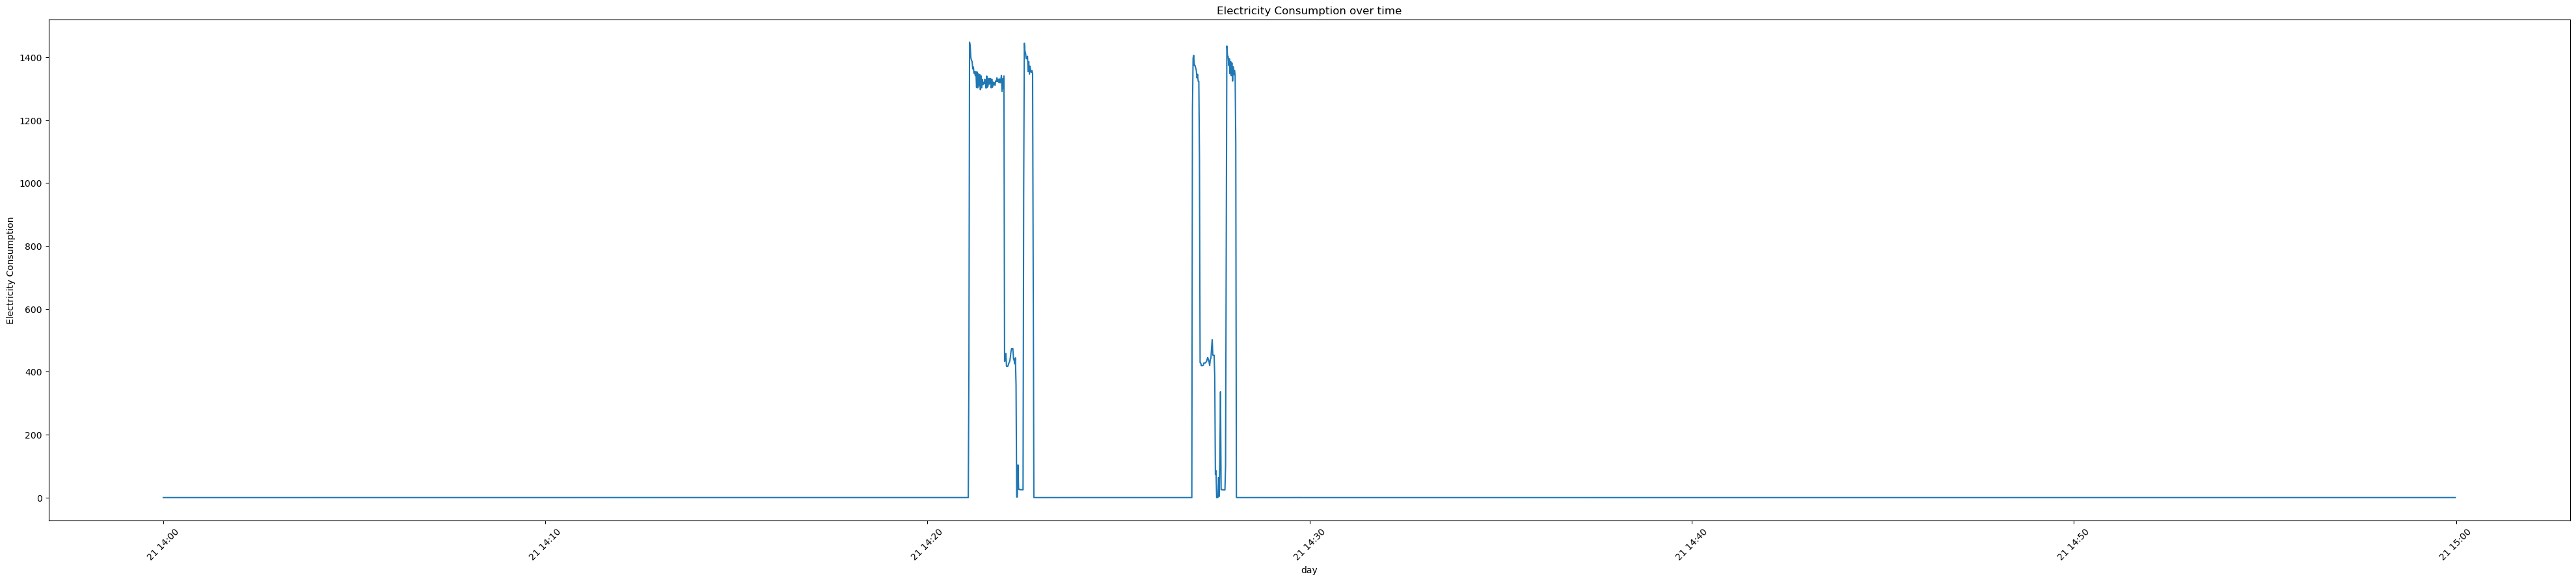

In [4]:
plot_usage(df_cm_cache.loc['2019-10-21 14'])

In [5]:
df_cm_train, df_cm_test = split_train_test(df_cm_cache, "2019-10-22", "2019-11-18")

### Train

In [6]:
df_cm_train

,coffee_machine_electricity_consumption
time,
2019-10-22 00:00:01,0.000000
2019-10-22 00:00:02,0.050000
2019-10-22 00:00:03,0.050000
2019-10-22 00:00:04,0.100000
2019-10-22 00:00:05,0.066667
...,...
2019-11-17 23:59:55,0.000000
2019-11-17 23:59:56,0.000000
2019-11-17 23:59:57,0.100000


In [7]:
cm_at_train = activation_times(df_cm_train)

In [8]:
cm_at_train

,power_consumption_before,power_consumption_during,power_consumption_after
2019-10-22 05:23:21,0.100000,1497.500000,1410.583333
2019-10-22 05:25:56,0.083333,993.900000,1441.500000
2019-10-22 05:26:38,0.000000,77.850000,299.750000
2019-10-22 05:26:53,0.200000,6.771429,12.733333
2019-10-22 06:10:08,0.200000,1491.050000,1417.314286
...,...,...,...
2019-11-17 07:42:25,0.060000,314.700000,471.150000
2019-11-17 10:18:12,0.000000,421.220000,1483.650000
2019-11-17 13:58:28,0.100000,1049.566667,1521.500000
2019-11-17 13:59:40,0.000000,13.540000,25.750000


In [9]:
df_cm_at_train = add_time_frame(cm_at_train)
df_cm_at_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-10-22,4,2,0,0,Tuesday
2019-10-23,3,0,1,0,Wednesday
2019-10-24,3,0,1,0,Thursday
2019-10-25,2,2,3,0,Friday
2019-10-26,4,0,0,0,Saturday
2019-10-27,0,6,1,0,Sunday
2019-10-28,0,5,2,0,Monday
2019-10-29,0,4,2,0,Tuesday
2019-10-30,0,3,2,0,Wednesday
2019-10-31,0,4,1,0,Thursday


In [10]:
cm_pivot_table = create_pivot_table(df_cm_at_train)
cm_pivot_table

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,2,7,16,0
Monday,0,7,11,0
Saturday,4,6,11,0
Sunday,1,9,17,0
Thursday,3,5,12,0
Tuesday,4,4,15,0
Wednesday,3,6,15,0


### Test

In [11]:
df_cm_test

,coffee_machine_electricity_consumption
time,
2019-11-18 00:00:00,0.033333
2019-11-18 00:00:01,0.000000
2019-11-18 00:00:02,0.033333
2019-11-18 00:00:03,0.116667
2019-11-18 00:00:04,0.066667
...,...
2019-11-25 11:22:43,0.000000
2019-11-25 11:22:44,0.050000
2019-11-25 11:22:45,0.200000


In [12]:
cm_test_at = activation_times(df_cm_test)
cm_test_at

,power_consumption_before,power_consumption_during,power_consumption_after
2019-11-18 06:26:46,0.000000,28.600000,1273.357143
2019-11-18 06:28:09,0.000000,8.600000,25.540000
2019-11-18 06:29:07,0.140000,481.600000,1419.950000
2019-11-18 06:48:16,0.016667,76.733333,456.560000
2019-11-18 13:23:56,0.100000,1467.300000,1433.700000
2019-11-18 13:26:56,0.000000,607.440000,1480.120000
2019-11-19 06:19:40,0.000000,776.316667,1520.200000
2019-11-19 06:22:25,0.040000,484.900000,1436.860000
2019-11-19 06:55:26,0.000000,731.780000,497.650000
2019-11-20 06:43:00,0.060000,597.040000,1442.733333


In [13]:
df_cm_at_test = add_time_frame(cm_test_at)
df_cm_at_test

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-11-18,0,4,2,0,Monday
2019-11-19,0,3,0,0,Tuesday
2019-11-20,0,3,3,0,Wednesday
2019-11-21,0,6,2,0,Thursday
2019-11-22,0,4,0,0,Friday
2019-11-23,0,4,2,0,Saturday
2019-11-24,0,5,4,0,Sunday
2019-11-25,0,3,0,0,Monday


### BBA Coffee Machine

In [14]:
cm_bba = probabilities(cm_pivot_table, df_cm_at_test)
cm_bba

,0am-6am,6am-12pm,12pm-6pm,6pm-12am
2019-11-18,0.0,0.363636,0.285714,0.0
2019-11-19,0.0,0.200000,0.000000,0.0
2019-11-20,0.0,0.200000,0.500000,0.0
2019-11-21,0.0,0.500000,0.400000,0.0
2019-11-22,0.0,0.250000,0.000000,0.0
2019-11-23,0.0,0.363636,0.333333,0.0
2019-11-24,0.0,0.294118,0.444444,0.0
2019-11-25,0.0,0.272727,0.000000,0.0


In [15]:
cm_masses = calculate_belief_masses(df_cm_at_test, cm_bba)
cm_masses

,intervals
date,
2019-11-18,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.15..."
2019-11-19,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.07..."
2019-11-20,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.07..."
2019-11-21,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.24..."
2019-11-22,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.09..."
2019-11-23,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.15..."
2019-11-24,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.11..."
2019-11-25,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.11..."


## Garage door opener

In [16]:
df_go = pd.read_csv("C:/Users/sanam/Documents/GeLaP/hh-16/label_001.csv")
df_go_cache = pre_process(df_go,"garage_opener")

In [17]:
df_go_cache

,garage_opener_electricity_consumption
time,
2019-10-21 12:30:00,0.900000
2019-10-21 12:30:01,0.866667
2019-10-21 12:30:02,0.960000
2019-10-21 12:30:03,1.100000
2019-10-21 12:30:04,0.900000
...,...
2019-11-25 11:33:21,25.157143
2019-11-25 11:33:22,25.050000
2019-11-25 11:33:23,17.450000


In [18]:
df_go_train, df_go_test = split_train_test(df_go_cache, "2019-10-22", "2019-11-18")

### Train

In [19]:
df_go_train

,garage_opener_electricity_consumption
time,
2019-10-22 00:00:01,0.900000
2019-10-22 00:00:02,0.897222
2019-10-22 00:00:03,0.894444
2019-10-22 00:00:04,0.891667
2019-10-22 00:00:05,0.888889
...,...
2019-11-17 23:59:55,0.881204
2019-11-17 23:59:56,0.881211
2019-11-17 23:59:57,0.881217


In [20]:
go_at_train = activation_times(df_go_train)

In [21]:
go_at_train 

,power_consumption_before,power_consumption_during,power_consumption_after
2019-10-22 09:12:43,0.900000,3.825000,6.750000
2019-10-22 10:01:35,0.900000,21.000000,41.100000
2019-10-22 14:02:30,0.850000,29.600000,105.100000
2019-10-23 06:59:32,1.100000,184.466667,208.100000
2019-10-23 13:30:18,0.800000,1.540909,2.281818
2019-10-24 06:53:59,0.700000,1.450000,46.700000
2019-10-24 13:38:28,0.800000,41.692000,82.584000
2019-10-25 08:06:25,0.966667,43.466667,90.800000
2019-10-25 09:03:28,0.900000,2.800000,51.300000
2019-10-26 04:56:35,0.866667,47.600000,101.600000


In [22]:
df_go_at_train = add_time_frame(go_at_train)
df_go_at_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-10-22,0,2,1,0,Tuesday
2019-10-23,0,1,1,0,Wednesday
2019-10-24,0,1,1,0,Thursday
2019-10-25,0,2,0,0,Friday
2019-10-26,1,0,1,0,Saturday
2019-10-27,1,1,1,0,Sunday
2019-10-28,0,1,1,0,Monday
2019-10-29,0,1,1,0,Tuesday
2019-10-30,0,1,1,0,Wednesday
2019-10-31,0,1,2,0,Thursday


In [23]:
go_pivot_table = create_pivot_table(df_go_at_train)
go_pivot_table

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,0,5,0
Monday,0,6,4,0
Saturday,1,2,3,0
Sunday,1,3,4,0
Thursday,0,5,2,2
Tuesday,0,5,4,0
Wednesday,0,2,4,0


### Test

In [24]:
df_go_test

,garage_opener_electricity_consumption
time,
2019-11-18 00:00:00,0.881236
2019-11-18 00:00:01,0.881242
2019-11-18 00:00:02,0.881249
2019-11-18 00:00:03,0.881255
2019-11-18 00:00:04,0.881261
...,...
2019-11-25 11:33:21,25.157143
2019-11-25 11:33:22,25.050000
2019-11-25 11:33:23,17.450000


In [25]:
go_test_at = activation_times(df_go_test)
go_test_at

,power_consumption_before,power_consumption_during,power_consumption_after
2019-11-18 17:52:41,0.800000,12.150000,23.500000
2019-11-19 09:37:20,1.000000,96.100000,100.300000
2019-11-20 12:13:03,0.900000,1.100000,28.080000
2019-11-23 10:27:16,0.900000,2.600000,2.600000
2019-11-23 12:13:34,0.900000,18.966667,37.033333
2019-11-23 16:39:11,0.900000,7.322222,13.744444
2019-11-23 19:00:36,0.800000,156.300000,75.375000
2019-11-24 08:12:32,0.800000,169.500000,101.600000
2019-11-24 09:07:03,0.800000,92.100000,124.300000
2019-11-24 14:16:46,0.900000,58.700000,102.100000


In [26]:
df_go_at_test = add_time_frame(go_test_at)
df_go_at_test

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-11-18,0,0,1,0,Monday
2019-11-19,0,1,0,0,Tuesday
2019-11-20,0,0,1,0,Wednesday
2019-11-23,0,1,2,1,Saturday
2019-11-24,0,2,2,0,Sunday
2019-11-25,0,1,0,0,Monday


### BBA Garage door opener

In [27]:
go_bba = probabilities(go_pivot_table, df_go_at_test)
go_bba

,0am-6am,6am-12pm,12pm-6pm,6pm-12am
2019-11-18,0.0,0.000000,0.166667,0.0
2019-11-19,0.0,0.250000,0.000000,0.0
2019-11-20,0.0,0.000000,0.500000,0.0
2019-11-23,0.0,0.333333,1.000000,1.0
2019-11-24,0.0,0.500000,0.666667,0.0
2019-11-25,0.0,0.250000,0.000000,0.0


In [28]:
go_masses = calculate_belief_masses(df_go_at_test, go_bba)
go_masses

,intervals
date,
2019-11-18,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2019-11-19,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.09..."
2019-11-20,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2019-11-23,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.14..."
2019-11-24,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.24..."
2019-11-25,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.09..."


## Toaster

In [29]:
df_t = pd.read_csv("C:/Users/sanam/Documents/GeLaP/hh-16/label_003.csv")
df_t_cache = pre_process(df_t,"toaster")

In [30]:
df_t_train, df_t_test = split_train_test(df_t_cache,"2019-10-22", "2019-11-18")

### Train

In [31]:
df_t_train

,toaster_electricity_consumption
time,
2019-10-22 00:00:01,0.0
2019-10-22 00:00:02,0.0
2019-10-22 00:00:03,0.0
2019-10-22 00:00:04,0.0
2019-10-22 00:00:05,0.0
...,...
2019-11-17 23:59:55,0.0
2019-11-17 23:59:56,0.0
2019-11-17 23:59:57,0.0


In [32]:
t_at_train = activation_times(df_t_train)
t_at_train

,power_consumption_before,power_consumption_during,power_consumption_after
2019-10-22 06:07:16,0.0,2215.657143,2163.416667
2019-10-22 06:14:43,0.0,610.057143,2205.766667
2019-10-23 05:34:11,0.0,2067.466667,2157.628571
2019-10-24 05:37:29,0.0,377.483333,2230.100000
2019-10-25 06:17:23,0.0,1469.083333,2126.400000
2019-10-25 06:18:31,0.0,1411.216667,2171.033333
2019-10-26 03:49:17,0.0,1709.580000,2135.620000
2019-10-26 03:58:24,0.0,660.800000,2132.150000
2019-10-27 06:39:13,0.0,955.714286,2188.500000
2019-10-28 06:30:59,0.0,1041.500000,2189.200000


In [33]:
df_t_at_train = add_time_frame(t_at_train)
df_t_at_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-10-22,0,2,0,0,Tuesday
2019-10-23,1,0,0,0,Wednesday
2019-10-24,1,0,0,0,Thursday
2019-10-25,0,2,0,0,Friday
2019-10-26,2,0,0,0,Saturday
2019-10-27,0,1,0,0,Sunday
2019-10-28,0,1,0,0,Monday
2019-10-29,0,1,0,0,Tuesday
2019-10-30,0,1,0,0,Wednesday
2019-11-01,0,2,0,0,Friday


In [34]:
t_pivot_table = create_pivot_table(df_t_at_train)
t_pivot_table

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,0,8,0
Monday,0,0,3,0
Saturday,2,0,4,0
Sunday,1,0,5,0
Thursday,1,0,1,0
Tuesday,0,2,5,0
Wednesday,1,0,4,0


### Test

In [35]:
df_t_test

,toaster_electricity_consumption
time,
2019-11-18 00:00:00,0.0
2019-11-18 00:00:01,0.0
2019-11-18 00:00:02,0.0
2019-11-18 00:00:03,0.0
2019-11-18 00:00:04,0.0
...,...
2019-11-25 11:22:18,0.0
2019-11-25 11:22:19,0.0
2019-11-25 11:22:20,0.0


In [36]:
t_at_test = activation_times(df_t_test)
t_at_test

Model is not converging.  Current: 5202054.903270269 is not greater than 5202054.9032733925. Delta is -3.123655915260315e-06


,power_consumption_before,power_consumption_during,power_consumption_after
2019-11-18 06:37:29,0.0,151.800000,1648.928571
2019-11-19 06:41:41,0.0,1991.014286,2166.850000
2019-11-20 06:46:50,0.0,1719.383333,2080.100000
2019-11-21 07:05:17,0.0,728.000000,2106.333333
2019-11-22 07:34:21,0.0,1816.050000,2188.800000
2019-11-22 07:35:57,0.0,566.940000,2141.466667
2019-11-23 07:39:44,0.0,1857.085714,2210.000000
2019-11-24 06:48:27,0.0,1423.000000,2190.150000
2019-11-25 06:29:18,0.0,2046.800000,2184.166667


In [37]:
df_t_at_test = add_time_frame(t_at_test)
df_t_at_test

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-11-18,0,1,0,0,Monday
2019-11-19,0,1,0,0,Tuesday
2019-11-20,0,1,0,0,Wednesday
2019-11-21,0,1,0,0,Thursday
2019-11-22,0,2,0,0,Friday
2019-11-23,0,1,0,0,Saturday
2019-11-24,0,1,0,0,Sunday
2019-11-25,0,1,0,0,Monday


In [38]:
df_t_at_test['day']

2019-11-18       Monday
2019-11-19      Tuesday
2019-11-20    Wednesday
2019-11-21     Thursday
2019-11-22       Friday
2019-11-23     Saturday
2019-11-24       Sunday
2019-11-25       Monday
Name: day, dtype: object

### BBA Toaster

In [39]:
t_bba = probabilities(t_pivot_table, df_t_at_test)
t_bba

,0am-6am,6am-12pm,12pm-6pm,6pm-12am
2019-11-18,0.0,0.333333,0.0,0.0
2019-11-19,0.0,0.200000,0.0,0.0
2019-11-20,0.0,0.250000,0.0,0.0
2019-11-21,0.0,1.000000,0.0,0.0
2019-11-22,0.0,0.250000,0.0,0.0
2019-11-23,0.0,0.250000,0.0,0.0
2019-11-24,0.0,0.200000,0.0,0.0
2019-11-25,0.0,0.333333,0.0,0.0


In [40]:
t_masses = calculate_belief_masses(df_t_at_test, t_bba)
t_masses

,intervals
date,
2019-11-18,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.14..."
2019-11-19,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.07..."
2019-11-20,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.09..."
2019-11-21,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.9,..."
2019-11-22,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.09..."
2019-11-23,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.09..."
2019-11-24,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.07..."
2019-11-25,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.14..."


## Computer

In [41]:
df_c = pd.read_csv("C:/Users/sanam/Documents/GeLaP/hh-16/label_005.csv")
df_c_cache = pre_process(df_c,"computer")

In [42]:
df_c_train, df_c_test = split_train_test(df_c_cache,"2019-10-22", "2019-11-18")

### Train

In [43]:
df_c_train

,computer_electricity_consumption
time,
2019-10-22 00:00:01,1.000000
2019-10-22 00:00:02,0.933333
2019-10-22 00:00:03,0.900000
2019-10-22 00:00:04,0.985714
2019-10-22 00:00:05,1.042857
...,...
2019-11-17 23:59:55,0.916667
2019-11-17 23:59:56,0.885714
2019-11-17 23:59:57,0.933333


In [44]:
c_at_train = activation_times(df_c_train)

In [45]:
c_at_train

,power_consumption_before,power_consumption_during,power_consumption_after
2019-10-22 14:24:58,0.920000,52.657143,109.500000
2019-10-23 06:25:44,0.900000,1.200000,30.050000
2019-10-23 14:11:56,0.950000,4.328571,62.783333
2019-10-23 15:43:04,0.866667,6.528571,48.580000
2019-10-24 13:46:09,0.900000,33.600000,108.650000
2019-10-25 07:07:02,0.916667,17.928571,85.466667
2019-10-25 09:18:24,0.950000,37.128571,105.440000
2019-10-25 15:03:38,0.833333,43.600000,108.500000
2019-10-26 15:52:12,0.933333,51.266667,106.360000
2019-10-27 11:50:28,0.933333,8.116667,64.500000


In [46]:
df_c_at_train = add_time_frame(c_at_train)
df_c_at_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-10-22,0,0,1,0,Tuesday
2019-10-23,0,1,2,0,Wednesday
2019-10-24,0,0,1,0,Thursday
2019-10-25,0,2,1,0,Friday
2019-10-26,0,0,1,0,Saturday
2019-10-27,0,1,0,0,Sunday
2019-10-28,0,1,0,0,Monday
2019-10-29,0,1,0,0,Tuesday
2019-10-30,0,2,0,0,Wednesday
2019-10-31,0,2,0,0,Thursday


In [47]:
c_pivot_table = create_pivot_table(df_c_at_train)
c_pivot_table

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,2,5,0
Monday,0,2,4,0
Saturday,0,2,3,0
Sunday,0,2,4,0
Thursday,0,4,5,0
Tuesday,0,3,4,0
Wednesday,0,4,7,0


### Test

In [48]:
df_c_test

,computer_electricity_consumption
time,
2019-11-18 00:00:00,0.933333
2019-11-18 00:00:01,0.980000
2019-11-18 00:00:02,0.928571
2019-11-18 00:00:03,0.833333
2019-11-18 00:00:04,0.928571
...,...
2019-11-25 11:13:56,1.000000
2019-11-25 11:13:57,1.000000
2019-11-25 11:13:58,1.033333


In [49]:
c_at_test = activation_times(df_c_test)
c_at_test

,power_consumption_before,power_consumption_during,power_consumption_after
2019-11-18 07:58:34,0.883333,40.766667,87.100000
2019-11-18 08:29:21,0.916667,36.614286,112.766667
2019-11-18 11:46:46,0.933333,8.350000,50.120000
2019-11-18 13:12:12,0.900000,9.950000,49.842857
2019-11-19 08:08:18,0.900000,40.550000,92.940000
2019-11-19 15:37:58,0.880000,20.242857,83.920000
2019-11-20 08:30:00,0.971429,44.450000,107.833333
2019-11-20 10:48:05,1.000000,79.114286,105.333333
2019-11-21 08:34:23,0.933333,9.900000,71.500000
2019-11-21 13:03:09,0.900000,29.366667,86.233333


In [50]:
df_c_at_test = add_time_frame(c_at_test)
df_c_at_test

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-11-18,0,3,1,0,Monday
2019-11-19,0,1,1,0,Tuesday
2019-11-20,0,2,0,0,Wednesday
2019-11-21,0,1,1,0,Thursday
2019-11-22,0,1,1,1,Friday
2019-11-23,0,1,0,0,Saturday
2019-11-24,0,1,0,0,Sunday
2019-11-25,0,2,0,0,Monday


### BBA Computer

In [51]:
c_bba = probabilities(c_pivot_table, df_c_at_test)
c_bba

,0am-6am,6am-12pm,12pm-6pm,6pm-12am
2019-11-18,0.0,0.750000,0.500000,0.0
2019-11-19,0.0,0.250000,0.333333,0.0
2019-11-20,0.0,0.285714,0.000000,0.0
2019-11-21,0.0,0.200000,0.250000,0.0
2019-11-22,0.0,0.200000,0.500000,1.0
2019-11-23,0.0,0.333333,0.000000,0.0
2019-11-24,0.0,0.250000,0.000000,0.0
2019-11-25,0.0,0.500000,0.000000,0.0


In [52]:
c_masses = calculate_belief_masses(df_c_at_test, c_bba)
c_masses

,intervals
date,
2019-11-18,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.47..."
2019-11-19,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.09..."
2019-11-20,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.11..."
2019-11-21,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.07..."
2019-11-22,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.07..."
2019-11-23,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.14..."
2019-11-24,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.09..."
2019-11-25,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.24..."


## BBA Fusion

In [53]:
def calculate_masses(m_X, m_Y):
    m_h1_1 = m_Y[0] * m_X[0]
    m_h1_2 = m_Y[0] * m_X[1]
    m_h1_3 = m_Y[0] * m_X[2]
    m_h2_1 = m_Y[1] * m_X[0]
    m_h2_2 = m_Y[1] * m_X[1]
    m_h2_3 = m_Y[1] * m_X[2]
    m_h3_1 = m_Y[2] * m_X[0]
    m_h3_2 = m_Y[2] * m_X[1]
    m_h3_3 = m_Y[2] * m_X[2]
    k = m_h1_2 + m_h2_1
    m_h1 = round((m_h1_1 + m_h1_3 + m_h3_1) / (1 - k), 3)
    m_h2 = round((m_h2_2 + m_h2_3 + m_h3_2) / (1 - k), 3)
    m_h3 = round(m_h3_3 / (1 - k), 3)
    return [m_h1, m_h2, m_h3]

In [54]:
def bba_fusion(m1, m2):
    fusion = []
    dates = list(m1.index)
    tis = list(m1.loc[dates[0]]['intervals'].keys())

    for date in dates:
        date_data = {'date': date, 'intervals': {}}
        for ti in tis:
            try:
                m_X = m1.loc[date]['intervals'][ti]
            except KeyError:
                date_data['intervals'][ti] = m2.loc[date]['intervals'][ti]
                # Skip to the next date
                continue
            try:
                m_Y = m2.loc[date]['intervals'][ti]
            except KeyError:
                date_data['intervals'][ti] = m1.loc[date]['intervals'][ti]
                # Skip to the next date
                continue

            # Calculate masses using the calculate_masses function
            masses = calculate_masses(m_X, m_Y)
            date_data['intervals'][ti] = masses

        fusion.append(date_data)

    # Convert the list of dictionaries into a DataFrame
    df_fusion = pd.DataFrame(fusion)
    
    # Set the 'date' column as the index
    df_fusion.set_index('date', inplace=True)
    
    return df_fusion

In [55]:
def bba_fusion_daily(m):
    fusion = []
    dates = list(m.index)

    for date in dates:
        date_data = {'date': date, 'masses': {}}
        #tis = list(m.loc[date]['intervals'].keys())
        m_X = m.loc[date]['intervals']['0am-6am']
        m_Y = m.loc[date]['intervals']['6am-12pm']
        masses = calculate_masses(m_X, m_Y)
        m_Y = m.loc[date]['intervals']['12pm-6pm']
        masses = calculate_masses(masses, m_Y)
        m_Y = m.loc[date]['intervals']['6pm-12am']
        masses = calculate_masses(masses, m_Y)
        date_data['masses'] = masses
        fusion.append(date_data)

    # Convert the list of dictionaries into a DataFrame
    df_fusion = pd.DataFrame(fusion)
    
    # Set the 'date' column as the index
    df_fusion.set_index('date', inplace=True)
    
    return df_fusion

In [56]:
fusion = bba_fusion(cm_masses, go_masses)
fusion

,intervals
date,
2019-11-18,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2019-11-19,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2019-11-20,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2019-11-21,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.24..."
2019-11-22,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.09..."
2019-11-23,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2019-11-24,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2019-11-25,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."


In [57]:
cm_masses.loc['2019-11-18']['intervals']

{'0am-6am': array([0.1, 0. , 0.9]),
 '6am-12pm': array([0.15, 0.27, 0.58]),
 '12pm-6pm': array([0.11, 0.28, 0.61]),
 '6pm-12am': array([0.1, 0. , 0.9])}

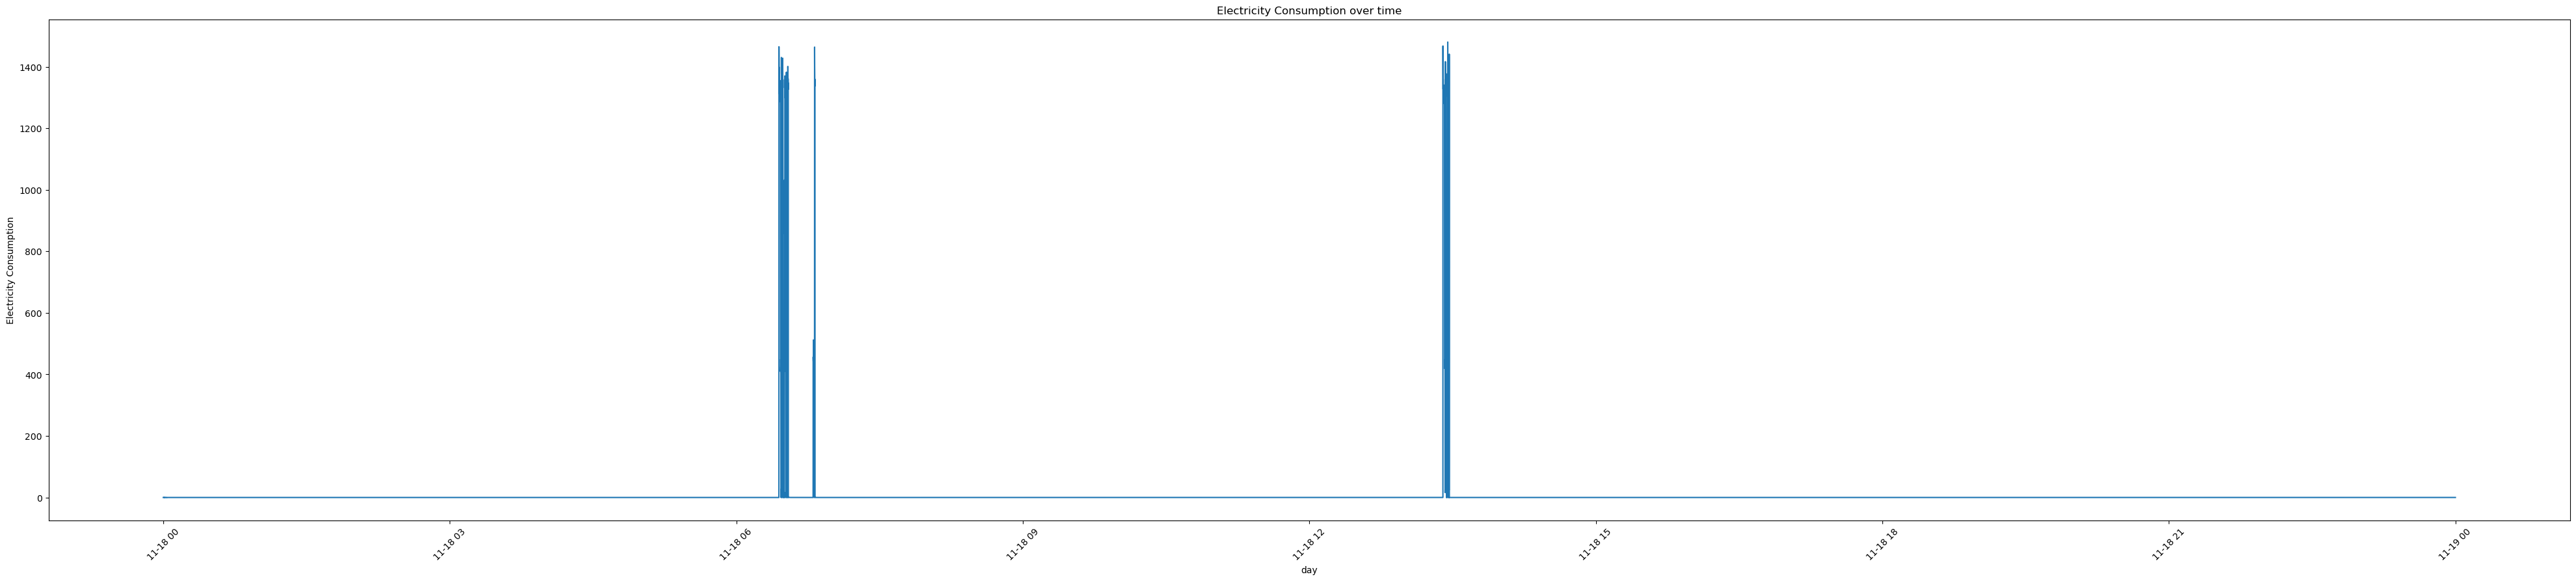

In [58]:
plot_usage(df_cm_test.loc['2019-11-18'])

In [59]:
df_cm_at_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-10-22,4,2,0,0,Tuesday
2019-10-23,3,0,1,0,Wednesday
2019-10-24,3,0,1,0,Thursday
2019-10-25,2,2,3,0,Friday
2019-10-26,4,0,0,0,Saturday
2019-10-27,0,6,1,0,Sunday
2019-10-28,0,5,2,0,Monday
2019-10-29,0,4,2,0,Tuesday
2019-10-30,0,3,2,0,Wednesday
2019-10-31,0,4,1,0,Thursday


In [60]:
df_cm_at_test

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-11-18,0,4,2,0,Monday
2019-11-19,0,3,0,0,Tuesday
2019-11-20,0,3,3,0,Wednesday
2019-11-21,0,6,2,0,Thursday
2019-11-22,0,4,0,0,Friday
2019-11-23,0,4,2,0,Saturday
2019-11-24,0,5,4,0,Sunday
2019-11-25,0,3,0,0,Monday


In [61]:
go_masses.loc['2019-11-18']['intervals']

{'0am-6am': array([0.1, 0. , 0.9]),
 '6am-12pm': array([0.1, 0. , 0.9]),
 '12pm-6pm': array([0.06, 0.3 , 0.64]),
 '6pm-12am': array([0.1, 0. , 0.9])}

In [62]:
fusion.loc['2019-11-18']['intervals']

{'0am-6am': [0.19, 0.0, 0.81],
 '6am-12pm': [0.214, 0.25, 0.536],
 '12pm-6pm': [0.12, 0.47, 0.411],
 '6pm-12am': [0.19, 0.0, 0.81]}

In [63]:
fusion1 = bba_fusion(fusion, t_masses)
fusion1

,intervals
date,
2019-11-18,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2019-11-19,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2019-11-20,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2019-11-21,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2019-11-22,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2019-11-23,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2019-11-24,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2019-11-25,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."


In [64]:
fusion2 = bba_fusion(fusion1, c_masses)
fusion2

,intervals
date,
2019-11-18,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2019-11-19,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2019-11-20,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2019-11-21,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2019-11-22,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2019-11-23,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2019-11-24,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2019-11-25,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."


In [65]:
fusion2.loc['2019-11-21']['intervals']

{'0am-6am': [0.271, 0.0, 0.729],
 '6am-12pm': [0.892, 0.068, 0.059],
 '12pm-6pm': [0.234, 0.408, 0.359],
 '6pm-12am': [0.271, 0.0, 0.729]}

In [66]:
daily_fusion = bba_fusion_daily(fusion2)
daily_fusion

,masses
date,
2019-11-18,"[0.674, 0.315, 0.038]"
2019-11-19,"[0.442, 0.477, 0.082]"
2019-11-20,"[0.599, 0.373, 0.066]"
2019-11-21,"[0.946, 0.07, 0.019]"
2019-11-22,"[0.924, 0.077, 0.021]"
2019-11-23,"[0.991, 0.008, 0.001]"
2019-11-24,"[0.642, 0.37, 0.043]"
2019-11-25,"[0.64, 0.297, 0.085]"


In [67]:
daily_fusion.loc['2019-11-21']['masses'][0]

0.946

## Belief and Plausibility

In [68]:
def calculate_belief_and_plausibility(m):
    merge = []
    dates = list(m.index)
    tis = list(m.loc[dates[0]]['intervals'].keys())
    for date in dates:
        date_data = {'date': date , 'results': {}}
        for ti in tis:
            X = m.loc[date]['intervals'][ti]
            bel_1 = X[0]
            bel_2 = X[1]
            bel_3 = X[2] + X[1] + X[0]
            pl_1 = X[0] + X[2]
            pl_2 = X[1] + X[2]
            pl_3 = X[2] + X[1] + X[0]
            date_data['results'][ti] = {'results' :{'m(h1)': X[0], 'm(h2)': X[1], 'm(h3)' : X[2],  'bel_1': bel_1, 'bel_2': bel_2, 'bel_3': bel_3, 'pl_1': pl_1, 'pl_2': pl_2, 'pl_3': pl_3}}
        merge.append(date_data)

    result = pd.DataFrame(merge)
    result.set_index('date', inplace=True)
    return result
    

In [69]:
bl_pl = calculate_belief_and_plausibility(fusion2)
bl_pl

,results
date,
2019-11-18,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2019-11-19,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2019-11-20,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2019-11-21,"{'0am-6am': {'results': {'m(h1)': 0.271, 'm(h2..."
2019-11-22,"{'0am-6am': {'results': {'m(h1)': 0.271, 'm(h2..."
2019-11-23,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2019-11-24,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2019-11-25,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."


In [70]:
bl_pl.loc['2019-11-21']['results']

{'0am-6am': {'results': {'m(h1)': 0.271,
   'm(h2)': 0.0,
   'm(h3)': 0.729,
   'bel_1': 0.271,
   'bel_2': 0.0,
   'bel_3': 1.0,
   'pl_1': 1.0,
   'pl_2': 0.729,
   'pl_3': 1.0}},
 '6am-12pm': {'results': {'m(h1)': 0.892,
   'm(h2)': 0.068,
   'm(h3)': 0.059,
   'bel_1': 0.892,
   'bel_2': 0.068,
   'bel_3': 1.0190000000000001,
   'pl_1': 0.9510000000000001,
   'pl_2': 0.127,
   'pl_3': 1.0190000000000001}},
 '12pm-6pm': {'results': {'m(h1)': 0.234,
   'm(h2)': 0.408,
   'm(h3)': 0.359,
   'bel_1': 0.234,
   'bel_2': 0.408,
   'bel_3': 1.001,
   'pl_1': 0.593,
   'pl_2': 0.7669999999999999,
   'pl_3': 1.001}},
 '6pm-12am': {'results': {'m(h1)': 0.271,
   'm(h2)': 0.0,
   'm(h3)': 0.729,
   'bel_1': 0.271,
   'bel_2': 0.0,
   'bel_3': 1.0,
   'pl_1': 1.0,
   'pl_2': 0.729,
   'pl_3': 1.0}}}

In [71]:
#bl_pl.to_csv('C:/Users/sanam/Documents/GeLaP/hh-16/belief_plausibility.csv')

In [72]:
def calculate_belief_and_plausibility_daily(m):
    merge = []
    dates = list(m.index)
    for date in dates:
        date_data = {'date': date , 'results': {}}
        X = m.loc[date]['masses']
        bel_1 = X[0]
        bel_2 = X[1]
        bel_3 = X[2] + X[1] + X[0]
        pl_1 = X[0] + X[2]
        pl_2 = X[1] + X[2]
        pl_3 = X[2] + X[1] + X[0]
        date_data['results'] = {'results' :{'m(h1)': X[0], 'm(h2)': X[1], 'm(h3)' : X[2],  'bel_1': bel_1, 'bel_2': bel_2, 'bel_3': bel_3, 'pl_1': pl_1, 'pl_2': pl_2, 'pl_3': pl_3}}
        merge.append(date_data)

    result = pd.DataFrame(merge)
    result.set_index('date', inplace=True)
    return result
    

In [73]:
bl_pl_daily = calculate_belief_and_plausibility_daily(daily_fusion)
bl_pl_daily

,results
date,
2019-11-18,"{'results': {'m(h1)': 0.674, 'm(h2)': 0.315, '..."
2019-11-19,"{'results': {'m(h1)': 0.442, 'm(h2)': 0.477, '..."
2019-11-20,"{'results': {'m(h1)': 0.599, 'm(h2)': 0.373, '..."
2019-11-21,"{'results': {'m(h1)': 0.946, 'm(h2)': 0.07, 'm..."
2019-11-22,"{'results': {'m(h1)': 0.924, 'm(h2)': 0.077, '..."
2019-11-23,"{'results': {'m(h1)': 0.991, 'm(h2)': 0.008, '..."
2019-11-24,"{'results': {'m(h1)': 0.642, 'm(h2)': 0.37, 'm..."
2019-11-25,"{'results': {'m(h1)': 0.64, 'm(h2)': 0.297, 'm..."


In [74]:
type(bl_pl)

pandas.core.frame.DataFrame

In [75]:
bl_pl_daily.loc['2019-11-21']['results']

{'results': {'m(h1)': 0.946,
  'm(h2)': 0.07,
  'm(h3)': 0.019,
  'bel_1': 0.946,
  'bel_2': 0.07,
  'bel_3': 1.035,
  'pl_1': 0.965,
  'pl_2': 0.08900000000000001,
  'pl_3': 1.035}}

In [1]:
def plot_results(df):
    time_frames = ['0am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']
    bel_1_values = []
    pl_1 = []

    # Extract bel_1 values for each time frame and concatenate them
    for date, row in df.iterrows():
        for time_frame in time_frames:
            results = row['results'][time_frame]['results']
            bel_1_values.append(results['bel_1'])
            pl_1.append(results['pl_1'])

    # Create a plot to connect 'bel_1' values across time frames
    plt.figure(figsize=(50, 10))
    #x_values = [f"{i}" for i in range(len(bel_1_values))]
    x_values = []
    for date in list(df.index):
        for time_frame in time_frames:
            x_values.append(f"{date} {time_frame}")
    #write the x_values vertically
    plt.xticks(rotation=90)
    plt.plot(x_values, bel_1_values, marker='o', linestyle='-')
    #also plot pl_1 the same way as bel_1 in the same plot
    plt.plot(x_values, pl_1, marker='o', linestyle='-')


    plt.title('Belief vs Plausibility for a normal routine')
    plt.xlabel('Date')
    plt.ylabel('Evidence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [77]:
def plot_results_daily(df):
    #time_frames = ['0am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']
    bel_1_values = []
    pl_1 = []

    # Extract bel_1 values for each time frame and concatenate them
    for date,row in df.iterrows():
            results = row['results']['results']
            bel_1_values.append(results['bel_1'])
            pl_1.append(results['pl_1'])

    # Create a plot to connect 'bel_1' values across time frames
    plt.figure(figsize=(12, 6))
    #x_values = [f"{i}" for i in range(len(bel_1_values))]
    x_values = list(df.index)
    #write the x_values vertically
    plt.xticks(rotation=90)
    plt.plot(x_values, bel_1_values, marker='o', linestyle='-')
    #also plot pl_1 the same way as bel_1 in the same plot
    plt.plot(x_values, pl_1, marker='o', linestyle='-')


    plt.title('Belief vs Plausibility for a normal routine')
    plt.xlabel('Date')
    plt.ylabel('Evidence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

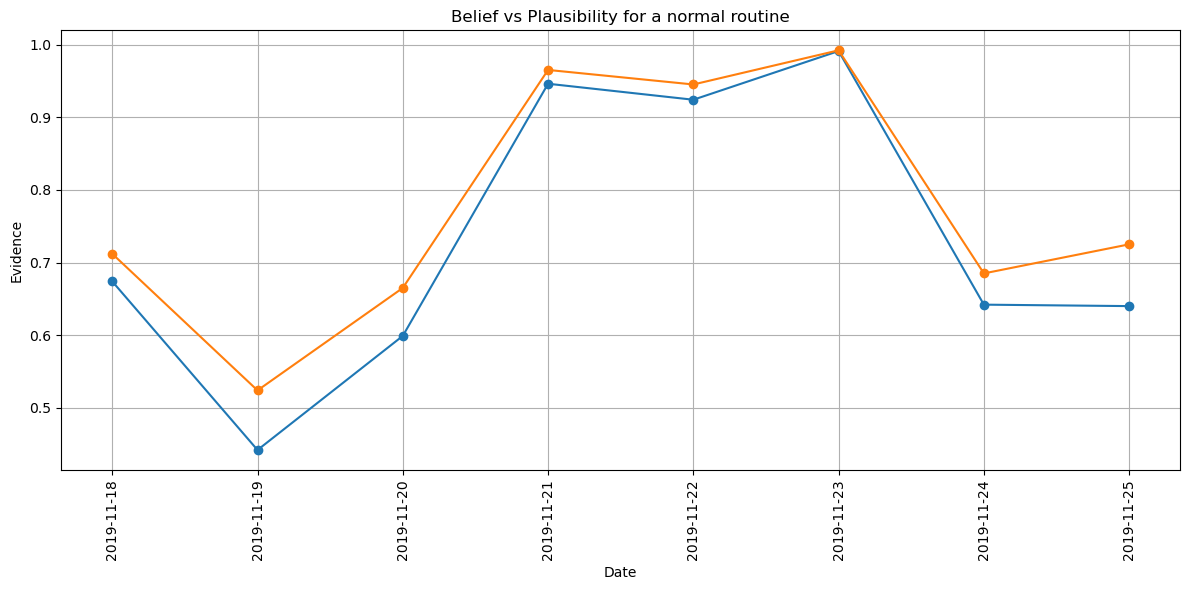

In [78]:
plot_results_daily(bl_pl_daily)

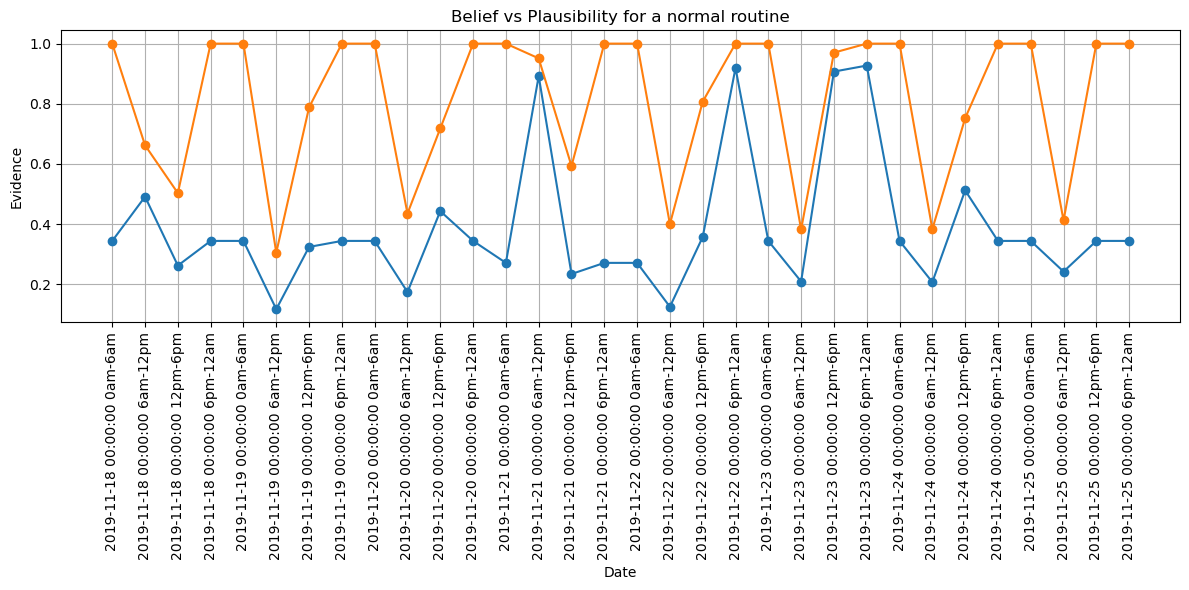

In [79]:
plot_results(bl_pl)

In [80]:
bl_pl_daily['results']

date
2019-11-18    {'results': {'m(h1)': 0.674, 'm(h2)': 0.315, '...
2019-11-19    {'results': {'m(h1)': 0.442, 'm(h2)': 0.477, '...
2019-11-20    {'results': {'m(h1)': 0.599, 'm(h2)': 0.373, '...
2019-11-21    {'results': {'m(h1)': 0.946, 'm(h2)': 0.07, 'm...
2019-11-22    {'results': {'m(h1)': 0.924, 'm(h2)': 0.077, '...
2019-11-23    {'results': {'m(h1)': 0.991, 'm(h2)': 0.008, '...
2019-11-24    {'results': {'m(h1)': 0.642, 'm(h2)': 0.37, 'm...
2019-11-25    {'results': {'m(h1)': 0.64, 'm(h2)': 0.297, 'm...
Name: results, dtype: object

In [81]:
bl_pl.loc['2019-11-23']['results']

{'0am-6am': {'results': {'m(h1)': 0.344,
   'm(h2)': 0.0,
   'm(h3)': 0.656,
   'bel_1': 0.344,
   'bel_2': 0.0,
   'bel_3': 1.0,
   'pl_1': 1.0,
   'pl_2': 0.656,
   'pl_3': 1.0}},
 '6am-12pm': {'results': {'m(h1)': 0.209,
   'm(h2)': 0.618,
   'm(h3)': 0.173,
   'bel_1': 0.209,
   'bel_2': 0.618,
   'bel_3': 0.9999999999999999,
   'pl_1': 0.382,
   'pl_2': 0.7909999999999999,
   'pl_3': 0.9999999999999999}},
 '12pm-6pm': {'results': {'m(h1)': 0.907,
   'm(h2)': 0.03,
   'm(h3)': 0.063,
   'bel_1': 0.907,
   'bel_2': 0.03,
   'bel_3': 1.0,
   'pl_1': 0.97,
   'pl_2': 0.093,
   'pl_3': 1.0}},
 '6pm-12am': {'results': {'m(h1)': 0.927,
   'm(h2)': 0.0,
   'm(h3)': 0.073,
   'bel_1': 0.927,
   'bel_2': 0.0,
   'bel_3': 1.0,
   'pl_1': 1.0,
   'pl_2': 0.073,
   'pl_3': 1.0}}}